In [32]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from exp_parameters import *
from scipy.special import i1, i0

%matplotlib notebook

# Droplet frequency dispersion relation

## plot dispersion relation (frequency vs wavenumber) for known jet radius

In [55]:
R0 = 10e-6/2 # jet radius um

x = np.linspace(0, 1, 200) # x=k*R0

# dispersion relation of the frequency w and dimensionless wavenumber x=k*R0:
w = surf_tension(T, algorithm=1) / (density(T, algorithm=1) * R0**3) * x * i1(x) / i0(x) * (1 - x**2)

lambda_drop = 2*np.pi*R0 / x # droplet wavelength um

/var/folders/t0/b62grl953r99pk13mhcqq_v40000gn/T/ipykernel_88222/1885036407.py:8: RuntimeWarning: divide by zero encountered in true_divide
  lambda_drop = 2*np.pi*R0 / x # droplet wavelength um


<IPython.core.display.Javascript object>


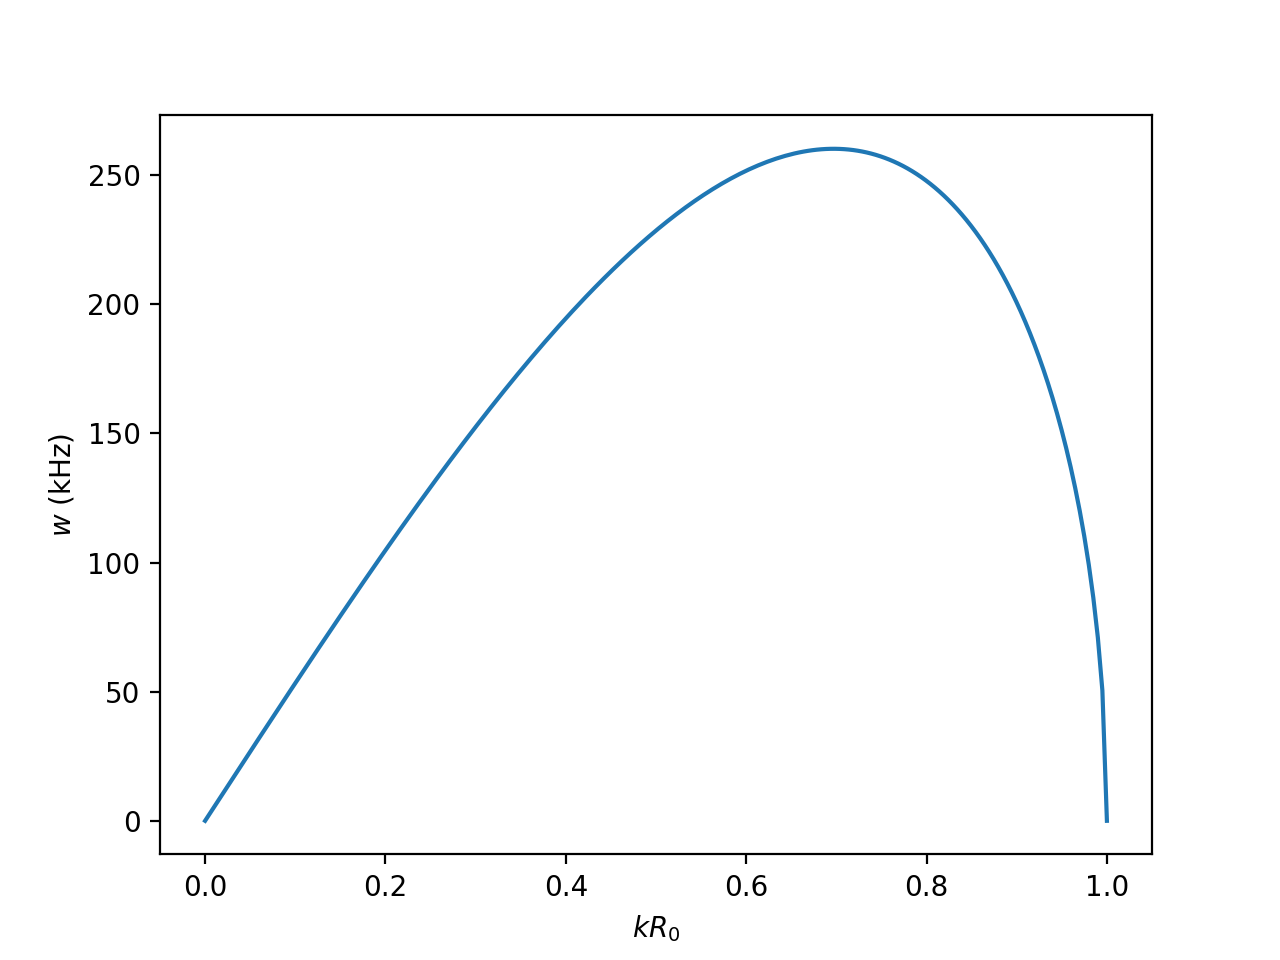

<IPython.core.display.Javascript object>


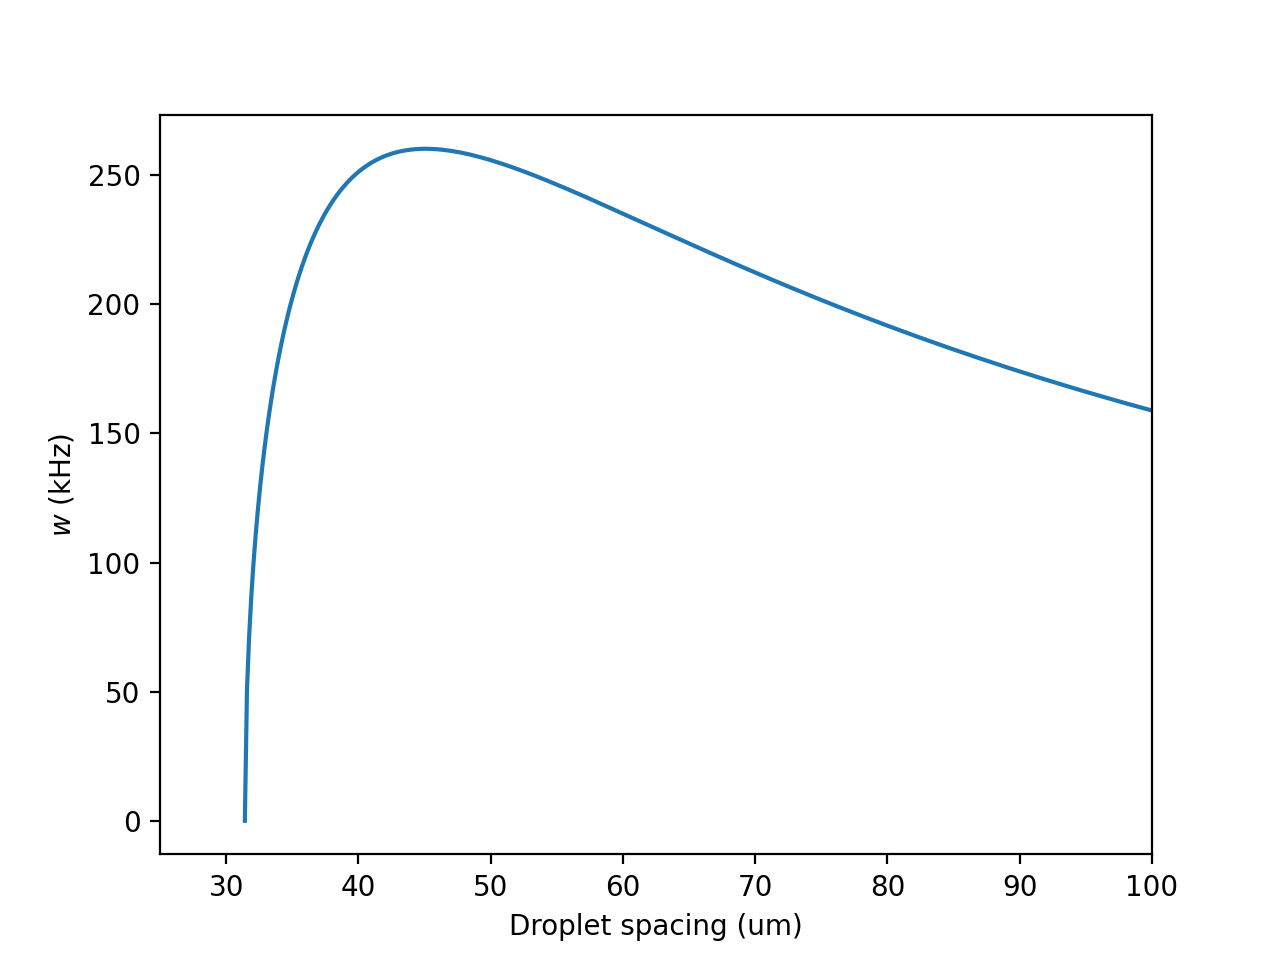

(25.0, 100.0)

In [56]:
plt.figure()
plt.plot(x,np.sqrt(w)/1e3)
plt.xlabel(r'$kR_0$')
plt.ylabel(r'$w$ (kHz)')

plt.figure()
plt.plot(lambda_drop[1:]*1e6,np.sqrt(w[1:])/1e3)
plt.ylabel(r'$w$ (kHz)')
plt.xlabel('Droplet spacing (um)')
plt.xlim([25,100])
#plt.xscale('log')
#plt.yscale('log')

In [57]:
# write input values using dispersion relation above:
frequency = 137e3 # Hz
wavelength = 32.7e-6 # m

v = frequency*wavelength # droplet velocity m/s

R = (3/4 * wavelength * R0**2)**(1/3) # droplet radius m

print('droplet spacing:', wavelength*1e6, 'um')
print('droplet size:', R*2*1e6, 'um')
print('velocity', v, 'm/s')

droplet spacing: 32.7 um
droplet size: 16.990767766835432 um
velocity 4.479900000000001 m/s


## calculate optimum wavelength (highest growth rate) for jet

In [2]:
# optimum wavelength λopt = 2√2πR0
# droplet volume V = 4/3*π*R^3 = λopt*π*R0^2  
# i.e. the volume of droplet equals the volume of a wavelgnth of the jet cylinder
# --> R^3 = 3/4 * λopt * R0^2

lambda_opt = 2 * np.sqrt(2) * np.pi * R0 # the optimum wavelength m

R = (3/4 * lambda_opt * R0**2)**(1/3) # droplet radius m

print('optimum wavelength', lambda_opt*1e6, 'um')
print('droplet size:', R*2*1e6, 'um')

optimum wavelength 44.42882938158366 um
droplet size: 18.818516168923782 um


### the corresponding frequency at specific jet velocity

In [3]:
v=8 # m/s

v/lambda_opt*1e-3

180.06326323142122